# Multivariate Analysis Using Gradient Descent

In [169]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

%matplotlib inline

## Data Sourcing

Source: http://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

This data is a subset of the Million Song Dataset: http://labrosa.ee.columbia.edu/millionsong/ a collaboration between LabROSA (Columbia University) and The Echo Nest. Prepared by T. Bertin-Mahieux <tb2332 '@' columbia.edu>


## Data Cleaning

In [5]:
# READ THE "MILLION SONG" DATASET
songs = pd.read_csv("million-song/MillionSongDataset.txt", header=None)

In [6]:
songs.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [7]:
sum(songs.isnull().sum())

0

Since the sum of all missing values is 0, no cells need to be dropped.

### 1. Adding a column of ones for the bias term

The bias term is $\theta_{0}$ in the linear regression formula:

$$ h_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + \theta_{3}X_{3} + ... + \theta_{n}X_{n}$$

In [173]:
songs = pd.concat([pd.Series(1, index=songs.index, name='00'), songs], axis=1)
songs.head()
len(songs)

515345

### 2. Define independent and dependent variables

In [170]:
X = songs.drop(columns=0)
Y = songs.iloc[:, 1]

### 3. Normalize input variables

Each column is divided by the maximum values of the column. This causes each column's values to be in the range of 0 and 1. Despite being an optional step, it helps the algorithm reach its optimum faster.

In [171]:
for i in range(len(X.columns)):
    X.iloc[:, i] = X.iloc[:, i]/max(X.iloc[:, i])
X.head()

,00,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.0,0.805930,0.055905,0.226350,0.026055,-0.066419,-0.078797,-0.145079,-0.096516,0.053527,...,0.015478,-0.012173,0.018374,0.008865,0.004266,-0.006305,0.024142,-0.003932,-0.003715,0.003339
1,1.0,0.786381,0.047985,0.217830,0.038557,-0.039396,-0.149412,0.050848,-0.007260,0.128269,...,0.006740,-0.004403,0.010294,0.024727,-0.038012,-0.008800,0.024878,0.026001,0.007904,0.039712
2,1.0,0.822285,0.082944,0.172892,0.039958,-0.025104,-0.111584,-0.019018,-0.018544,0.109845,...,0.003612,0.005830,-0.015862,0.006308,-0.000290,0.011797,-0.040587,-0.000126,0.005366,-0.000979
3,1.0,0.778560,-0.004943,0.112429,0.007707,0.003708,-0.157708,0.029298,-0.081593,0.024266,...,0.041111,-0.038418,-0.005285,-0.026917,-0.048035,0.022550,-0.025441,0.021375,0.027001,0.027812
4,1.0,0.822496,0.109903,0.207834,0.025219,-0.060491,-0.101145,-0.072401,-0.073980,0.086378,...,0.011804,-0.012520,0.020222,-0.010222,-0.005728,-0.002048,0.018269,0.017019,0.007530,0.042409


### 4. Split for Training and Test Data

The training/test split would be:

Training: first 463,715 examples
Test: last 51,630 examples

This is as specified from the data's source website.

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=463715, test_size=51630, shuffle=False)

In [181]:
# Making the dataset smaller to easen computing power
train_ran = random.sample(range(len(X_train)), 5000)
test_ran = random.sample(range(len(X_test)), 1000)
X_train = X_train.iloc[train_ran, :]
Y_train = Y_train.iloc[train_ran]
X_test = X_test.iloc[test_ran, :]
Y_test = Y_test.iloc[test_ran]

### 5. Initiate $\theta$ values

The $\theta$ values are referring to the ones in the hypothesis equation:

$$ h_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + \theta_{3}X_{3} + ... + \theta_{n}X_{n}$$

In [182]:
theta = np.array([0]*len(X_train.columns))

### 6. Calculate number of training data (m)

This is the variable m in the cost function:

$$ J(\theta_{0}, \theta_{1}, \theta_{2}, ..) = \frac{1}{2m} \sum{(h_{i} - y_{i})^2}$$

In [183]:
m = len(X_train)

### 7. Define the hypothesis function

$$ h_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + \theta_{3}X_{3} + ... + \theta_{n}X_{n}$$


In [214]:
def hypothesis(theta, X):
    X = np.array(X)
    return X@theta

In [185]:
np.sum((hypothesis(theta, X_train)-np.array(Y_train))*X_train.iloc[:, 0])

-9991439.0

### 8. Define the cost function

$$ J(\theta) = \frac{1}{2m} \sum{(h_{\theta}(x^{(i)}) - y^{(i)})^2}$$

In [187]:
def cost(X, y, theta):
    const = 1/(2*m)
    total_sum = np.sum((hypothesis(theta, X)-np.array(y))**2)
    return const*total_sum

In [188]:
cost(X_train, Y_train, theta)

1996639.2833

### 9. Create function for gradient descent

Repeat until convergence: {
$$ \theta_{j} := \theta_{j}-\alpha \frac{1}{m} \sum^{m}_{i=1} ((h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}) $$

for j = 1, 2, ...n

}

In [189]:
def gradient_descent(X, y, theta, alpha, epochs):
    costs = []
    
    i = 0
    while i < epochs:
        constant = alpha*(1/m)
        for j in range(len(X.columns)):
            total_sum = np.sum((hypothesis(theta, X)-np.array(y))*X.iloc[:, j])
            theta[j] = theta[j] - constant*total_sum
        cost_val = cost(X, y, theta)
        costs.append(cost_val)
        i+=1
    return costs, theta

### 9. Use gradient descent function to get final cost and optimized parameters theta.

In [190]:
costs, theta = gradient_descent(X_train, Y_train, theta, 0.05, 500)

### 10. Predict output using optimized theta

In [216]:
y_prediction = hypothesis(theta, X_test)

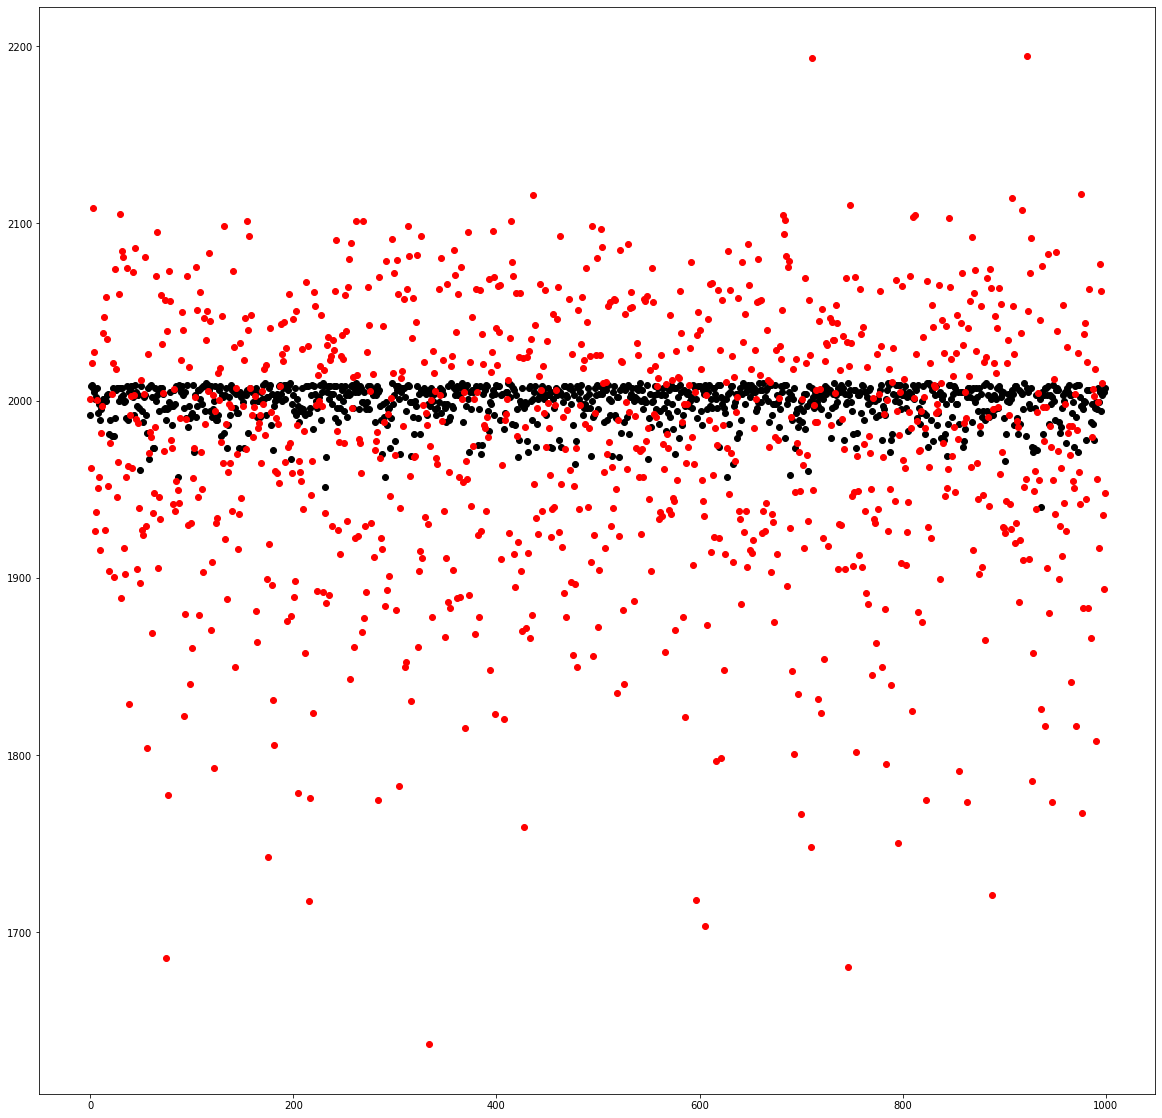

In [217]:
plt.figure(figsize=(20,20))
plt.scatter(x=list(range(len(X_test))), y=Y_test, color='black', )
plt.scatter(x=list(range(len(X_test))), y=y_prediction, color='red')

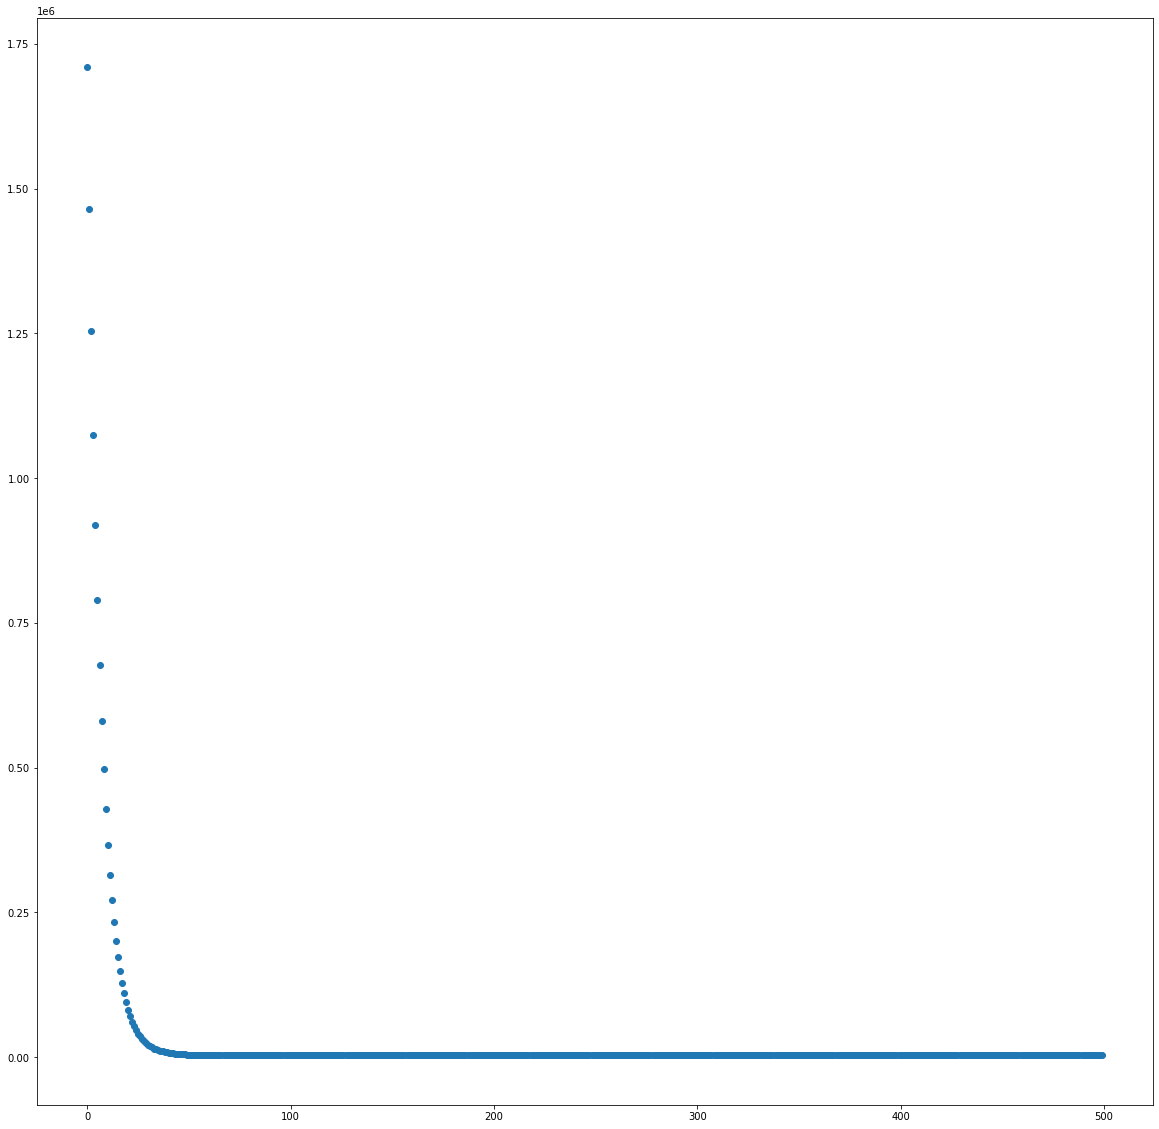

In [196]:
plt.figure(figsize=(20,20))
plt.scatter(x=list(range(500)), y=costs)
plt.show()

### 12. Plot target y values and predicted y values

### 13. Plot the error loss function